### Sports Celebrity Image Classification


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import matplotlib

#### (1) Preprocessing: Detect face and eyes

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

Now how do you detect face and eyes?

We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

(549, 976, 3)


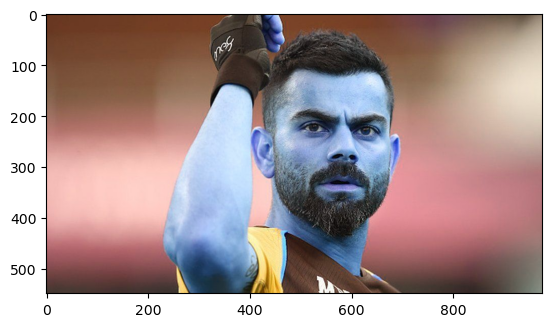

In [2]:
img = cv2.imread(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\dataset\virat_kohli\_121512755_gettyimages-1348507824-594x594.jpg")
if img is None:
    print('Error: Could not read image')
print(img.shape)
plt.imshow(img)

In [3]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(549, 976)

In [4]:
gray

array([[ 53,  53,  54, ..., 120, 121, 121],
       [ 53,  53,  54, ..., 122, 123, 123],
       [ 53,  53,  54, ..., 124, 125, 126],
       ...,
       [ 56,  56,  56, ..., 139, 141, 142],
       [ 55,  55,  55, ..., 140, 142, 144],
       [ 55,  55,  55, ..., 141, 143, 144]], dtype=uint8)

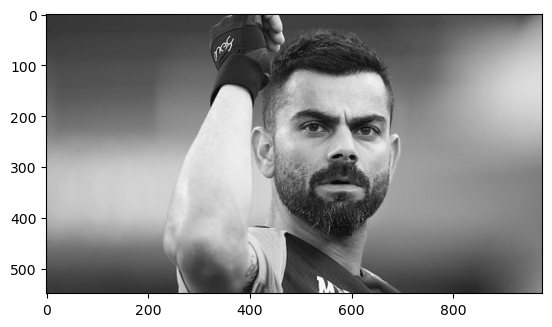

In [5]:
plt.imshow(gray, cmap='gray' )

In [6]:
face_cascade=cv2.CascadeClassifier(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\haarcascades\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[429, 107, 306, 306]])

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(429, 107, 306, 306)

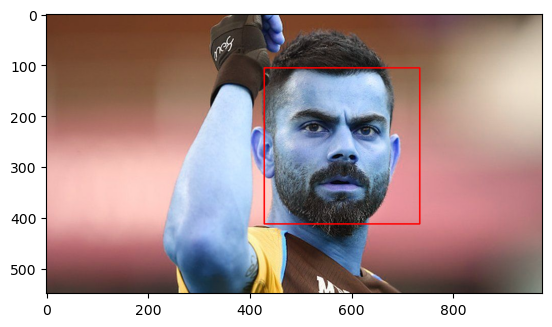

In [8]:
face_img=cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

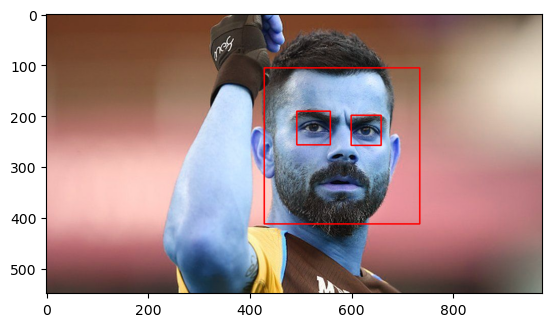

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray=gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255,0,0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### (2) Preprocessing: Crop the facial region of the image


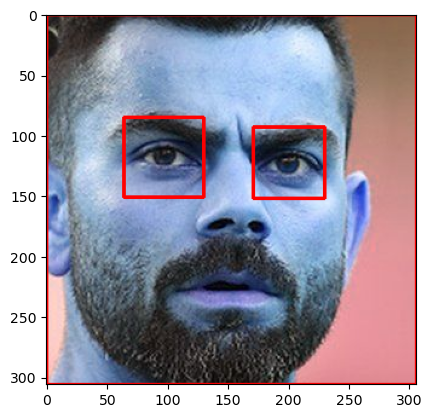

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
cropped_img=np.array(roi_color)
cropped_img.shape

(306, 306, 3)

### (3) Preprocessing: Use wavelet transform as a feature for traning our model


In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

#### Wavelet transform


In [12]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray=img
    #Datatype conversions
    #convert to grayscale
    imArray=cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # CONVERT TO FLOAT
    imArray = np.float32(imArray)
    imArray/=255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    # PROCESS COEFFICIENTS
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

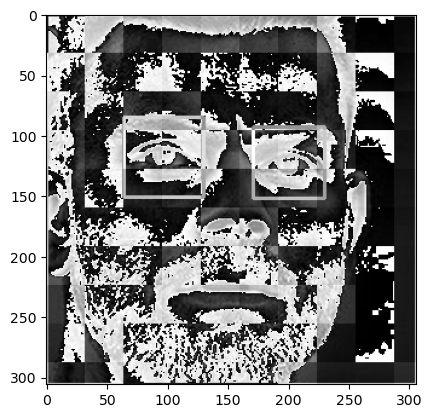

In [13]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray' )

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier


### (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)


In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color=img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

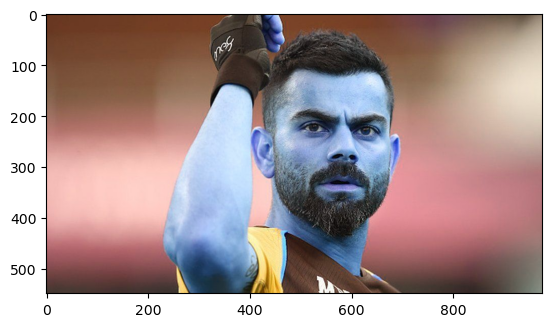

In [15]:
original_image =cv2.imread(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\dataset\virat_kohli\_121512755_gettyimages-1348507824-594x594.jpg")
plt.imshow(original_image)

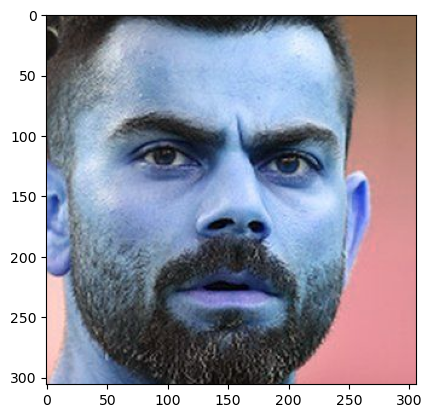

In [16]:
cropped_img=get_cropped_image_if_2_eyes(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\dataset\virat_kohli\_121512755_gettyimages-1348507824-594x594.jpg")
plt.imshow(cropped_img)

In below image face is not very clear and it doesn't have two eyes clearly visible



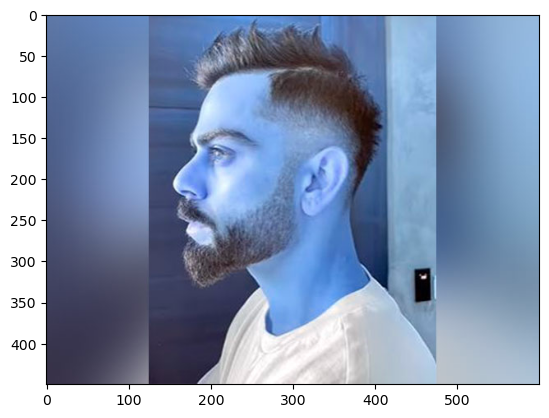

In [17]:
org_image_obstructed = cv2.imread(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\dataset\virat_kohli\2022_9_largeimg_1234811645.jpg")
plt.imshow(org_image_obstructed)

In [18]:
cropped_img_no_2_eyes = get_cropped_image_if_2_eyes(r"E:\D-S 121_Resources\DS_57 to 73_ML and DS Project\DS_66 to 73_ML & DS_ImageClassification_ Project\dataset\virat_kohli\2022_9_largeimg_1234811645.jpg")
cropped_img_no_2_eyes

Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training



In [19]:
path_to_data="E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/"
path_to_cr_data="E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/"


In [20]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cristiano_ronaldo',
 'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/lionel_messi',
 'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/maria_sharapova',
 'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/roger_federer',
 'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/serena_williams',
 'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/virat_kohli']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code



In [22]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count)  + '.png'
            cropped_file_path = cropped_folder + '/' +cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
                

Generating cropped images in folder:  E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo
Generating cropped images in folder:  E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/lionel_messi
Generating cropped images in folder:  E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/maria_sharapova
Generating cropped images in folder:  E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/roger_federer
Generating cropped images in folder:  E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/serena_williams
Generating cropped images in folder:  E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped

Now you should have cropped folder under datasets folder that contains cropped images


Manually examine cropped folder and delete any unwanted images


In [55]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'cristiano_ronaldo': ['E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  'E:/D-S 121_Resources/DS_57 to 73_ML and DS Project/DS_66 to 73_ML & DS_ImageClassification_ Project/dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.pn

In [56]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count = count+1
class_dict

{'cristiano_ronaldo': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now


In [57]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [58]:
len(x[0])

4096

In [59]:
y[1]

0

In [60]:
x[0]

array([[ 57],
       [ 56],
       [ 58],
       ...,
       [249],
       [251],
       [245]], dtype=uint8)

In [61]:
x=np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(245, 4096)

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning



In [62]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8163265306122449

In [83]:
print(classification_report(y_test, pipe.predict(x_test)))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.75      0.60      0.67        10
           2       1.00      0.85      0.92        13
           3       0.50      0.67      0.57         6
           4       1.00      0.83      0.91         6
           5       0.86      1.00      0.92         6

    accuracy                           0.82        49
   macro avg       0.82      0.82      0.81        49
weighted avg       0.84      0.82      0.82        49



#### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters


In [84]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [85]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [86]:
scores=[]
best_estimators = {}
import pandas as pd 
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train )
    scores.append({
        'model':algo,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df=pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.703974,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.484872,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.647821,{'logisticregression__C': 1}


In [87]:
best_estimators['svm'].score(x_test, y_test)

0.7959183673469388

In [88]:
best_estimators['random_forest'].score(x_test, y_test)

0.6530612244897959

In [90]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.7959183673469388

In [91]:
best_clf=best_estimators['svm']

In [92]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 6,  1,  1,  0,  0,  0],
       [ 0,  7,  0,  1,  1,  1],
       [ 0,  0, 11,  1,  1,  0],
       [ 0,  2,  0,  4,  0,  0],
       [ 1,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

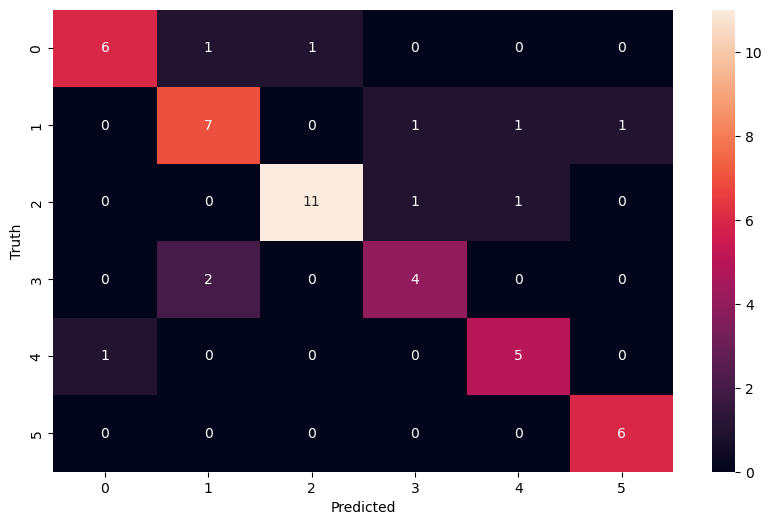

In [95]:
import seaborn as sn 
plt.figure(figsize=(10, 6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Save the trained model 

In [96]:
import joblib 
joblib.dump(best_clf, 'celebrity_classified_model.pkl')

['celebrity_classified_model.pkl']

#### Save class dictionary 

In [97]:
import json 
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))